simple momentum strategy
short-term MA vs long-term MA


In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt


In [3]:
gld = pdr.get_data_yahoo('GLD')
day = np.arange(1, len(gld) + 1)
gld['Day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace=True)
gld = gld[['Day', 'Open', 'High', 'Low', 'Close']]
gld.head()


,Day,Open,High,Low,Close
Date,,,,,
2017-03-27,1,119.930000,120.080002,119.269997,119.529999
2017-03-28,2,119.739998,119.830002,118.779999,119.040001
2017-03-29,3,119.220001,119.449997,119.050003,119.330002
2017-03-30,4,118.769997,119.120003,118.320000,118.470001
2017-03-31,5,118.610001,119.080002,118.459999,118.720001


In [4]:
gld.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-27 to 2022-03-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     1260 non-null   int32  
 1   Open    1260 non-null   float64
 2   High    1260 non-null   float64
 3   Low     1260 non-null   float64
 4   Close   1260 non-null   float64
dtypes: float64(4), int32(1)
memory usage: 54.1 KB


In [5]:
# BE CAREFUL: look-ahead bias.
# shift mean skip the first MA, because we use Close price so that we can only calculate the Close 9-day MA from day 10.
gld['9-day'] = gld['Close'].rolling(9).mean().shift()
# shift has the same meaning as above
gld['21-day'] = gld['Close'].rolling(21).mean().shift()
gld[19:25]


,Day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2017-04-24,20,120.769997,121.510002,120.660004,121.480003,121.814444,NaN
2017-04-25,21,120.529999,120.870003,120.050003,120.250000,122.038889,NaN
2017-04-26,22,120.209999,120.959999,119.870003,120.839996,121.934444,120.494286
2017-04-27,23,120.419998,120.599998,119.970001,120.389999,121.803333,120.556667
2017-04-28,24,120.339996,120.769997,120.269997,120.769997,121.557777,120.620952
2017-05-01,25,120.209999,120.750000,119.349998,119.669998,121.394444,120.689524


In [6]:
# if 9-day >21-day, signal = 1, else signal = 0.
gld['Signal'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
# if 9-day <21-day, signal = -1, else leave the value as before.
gld['Signal'] = np.where(gld['9-day'] < gld['21-day'], -1, gld['Signal'])
# In summary, 9-day > 21-day signal = 1, < signal = -1, = signal = 0.
gld[19:30]


,Day,Open,High,Low,Close,9-day,21-day,Signal
Date,,,,,,,,
2017-04-24,20,120.769997,121.510002,120.660004,121.480003,121.814444,NaN,0
2017-04-25,21,120.529999,120.870003,120.050003,120.250000,122.038889,NaN,0
2017-04-26,22,120.209999,120.959999,119.870003,120.839996,121.934444,120.494286,1
2017-04-27,23,120.419998,120.599998,119.970001,120.389999,121.803333,120.556667,1
2017-04-28,24,120.339996,120.769997,120.269997,120.769997,121.557777,120.620952,1
2017-05-01,25,120.209999,120.750000,119.349998,119.669998,121.394444,120.689524,1
2017-05-02,26,119.300003,119.650002,119.239998,119.650002,121.044444,120.746666,1
2017-05-03,27,119.180000,119.339996,117.919998,117.980003,120.813332,120.790952,1
2017-05-04,28,116.809998,117.279999,116.629997,116.790001,120.371111,120.725714,-1


In [7]:
# drop the NaN rows.
gld.dropna(inplace=True)
gld.head()


,Day,Open,High,Low,Close,9-day,21-day,Signal
Date,,,,,,,,
2017-04-26,22,120.209999,120.959999,119.870003,120.839996,121.934444,120.494286,1
2017-04-27,23,120.419998,120.599998,119.970001,120.389999,121.803333,120.556667,1
2017-04-28,24,120.339996,120.769997,120.269997,120.769997,121.557777,120.620952,1
2017-05-01,25,120.209999,120.750000,119.349998,119.669998,121.394444,120.689524,1
2017-05-02,26,119.300003,119.650002,119.239998,119.650002,121.044444,120.746666,1


In [8]:
# instantaneous returns
gld['return'] = np.log(gld['Close']).diff()  # .diff = row(n+1) - row(n)
gld['system return'] = gld['Signal'] * gld['return']
# calculate the entry points entry= 2 means from short to long, -2 from long to short, 0 remains the same position.
gld['entry'] = gld.Signal.diff()
gld[15:25]


,Day,Open,High,Low,Close,9-day,21-day,Signal,return,system return,entry
Date,,,,,,,,,,,
2017-05-17,37,119.360001,120.019997,119.269997,119.790001,116.751112,119.076667,-1,0.018026,-0.018026,0.0
2017-05-18,38,119.769997,119.839996,118.559998,118.809998,117.084446,118.932381,-1,-0.008215,0.008215,0.0
2017-05-19,39,119.389999,119.550003,118.879997,119.400002,117.284445,118.793334,-1,0.004954,-0.004954,0.0
2017-05-22,40,119.629997,120.139999,119.580002,119.900002,117.578890,118.671429,-1,0.004179,-0.004179,0.0
2017-05-23,41,120.129997,120.190002,118.980003,119.139999,118.006667,118.556667,-1,-0.006359,0.006359,0.0
2017-05-24,42,119.070000,119.739998,118.919998,119.610001,118.351112,118.445238,-1,0.003937,-0.003937,0.0
2017-05-25,43,119.519997,119.699997,119.290001,119.480003,118.696667,118.414762,1,-0.001087,-0.001087,2.0
2017-05-26,44,120.489998,120.790001,120.330002,120.540001,118.991112,118.350001,1,0.008833,0.008833,0.0
2017-05-30,45,120.239998,120.330002,119.949997,120.139999,119.368890,118.357144,1,-0.003324,-0.003324,0.0


In [9]:
# I dont know why I got index with duplicate values in original index. Therefore this is the code to find and remove the duplcate indicies
gld[gld.index.duplicated()]
gld = gld[~gld.index.duplicated()]


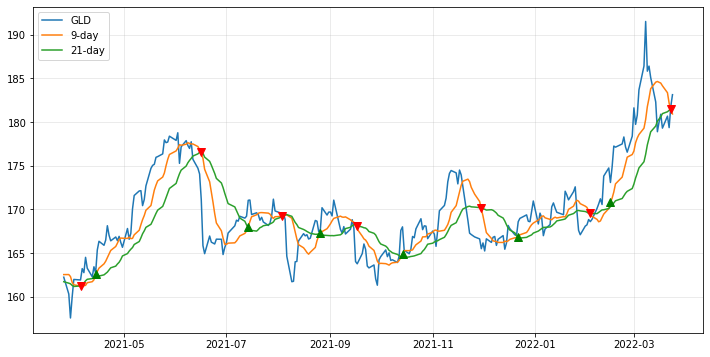

In [10]:
# plot the strategy
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha=0.3)
plt.plot(gld.iloc[-252:]['Close'], label='GLD')
plt.plot(gld.iloc[-252:]['9-day'], label='9-day')
plt.plot(gld.iloc[-252:]['21-day'], label='21-day')
plt.plot(gld[-252:].loc[gld.entry == 2].index, gld[-252:]
         ['9-day'][gld.entry == 2], '^', color='g', markersize=8)
plt.plot(gld[-252:].loc[gld.entry == -2].index, gld[-252:]
         ['21-day'][gld.entry == -2], 'v', color='r', markersize=8)
plt.legend(loc=2)


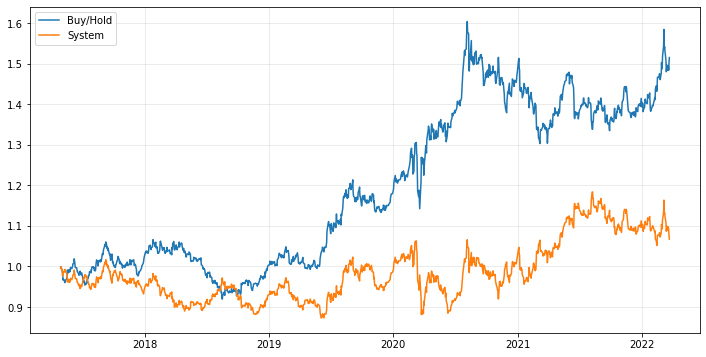

In [11]:
# plot the performance
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=0.3)


In [12]:
# overall return
return_buy_hold = np.exp(gld['return']).cumprod()[-1] - 1
return_buy_hold


0.5154750946097937

In [13]:
return_sytem = np.exp(gld['system return']).cumprod()[-1] - 1
return_sytem


0.06732504401551909

Well, the system is pretty bad as expected. If not, we are all living in LA by now
One more import thing is that the shift() function in the calculations of MA. Without it, we face look-ahead bias which will give us a very promising strategy
